<a href="https://colab.research.google.com/github/hwon-n/section2_project/blob/main/section2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture

# Ignore this warning: https://github.com/dmlc/xgboost/issues/4300
# xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='xgboost')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
pip install -U pandas_profiling

     |████████████████████████████████| 261 kB 29.9 MB/s 
     |████████████████████████████████| 303 kB 57.6 MB/s 
     |████████████████████████████████| 102 kB 14.3 MB/s 
     |████████████████████████████████| 675 kB 58.9 MB/s 
     |████████████████████████████████| 10.1 MB 47.8 MB/s 
     |████████████████████████████████| 596 kB 43.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 812 kB 44.9 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=932b2e267e83cb97a5a349dda5fe5afa48277be8fdc11792d18a68b6b92b37bd
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=9503e4c5d2250be1ffe1fbf673cac651ab76a4cbb3eda9aed9469ee2e9ff3127
 

In [4]:
pip install category_encoders

     |████████████████████████████████| 82 kB 476 kB/s 


In [5]:
pip install eli5

     |████████████████████████████████| 106 kB 27.2 MB/s 


In [6]:
pip install shap

     |████████████████████████████████| 371 kB 32.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509241 sha256=c814e41beb89a3c9c9294f5fc8fa76c6dac1816793f422c9625fb3b5d2cf63af
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [7]:
pip install pdpbox

     |████████████████████████████████| 34.0 MB 44 kB/s 
     |████████████████████████████████| 13.1 MB 6.9 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=efa630a5052637f945075abc77101f505301f5313ea24591205ceea96c69c54d
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [8]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import eli5
from math import sqrt
from scipy.stats import uniform
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, r2_score, f1_score, mean_absolute_error, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot

In [9]:
# 데이터 불러오기

train = pd.read_csv('/content/drive/MyDrive/Training Data.csv')

train.shape

(252000, 13)

In [10]:
# train.profile_report()

In [11]:
train.rename(columns = {
    'Id': 'ID',
    'Married/Single': 'MarriedOrSingle'
}, inplace = True)
train.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Income,1303834,7574516,3991815,6256451,5768871
Age,23,40,66,41,47
Experience,3,10,4,2,11
MarriedOrSingle,single,single,married,single,single
House_Ownership,rented,rented,rented,rented,rented
Car_Ownership,no,no,no,yes,no
Profession,Mechanical_engineer,Software_Developer,Technical_writer,Software_Developer,Civil_servant
CITY,Rewa,Parbhani,Alappuzha,Bhubaneswar,Tiruchirappalli[10]
STATE,Madhya_Pradesh,Maharashtra,Kerala,Odisha,Tamil_Nadu


In [12]:
# target 변수 설정 후 train, validation dataset 분할

target = 'Risk_Flag'

train, test = train_test_split(train, train_size = 0.8, random_state = 2, stratify = train[target])
train.shape, test.shape

((201600, 13), (50400, 13))

In [13]:
train, val = train_test_split(train, train_size = 0.8, random_state = 2, stratify = train[target])
train.shape, val.shape, test.shape

((161280, 13), (40320, 13), (50400, 13))

In [115]:
value = train[target].value_counts(normalize = True)
value[0]

0.8769965277777778

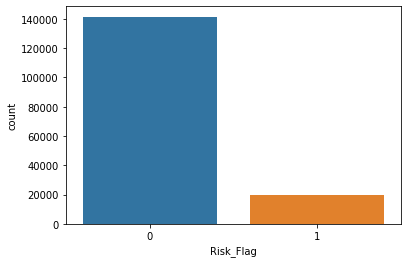

In [15]:
%matplotlib inline
ax = sns.countplot(data = train, x = target)
plt.show()

In [16]:
# 중복 데이터 확인

train.duplicated().value_counts()

False    161280
dtype: int64

In [17]:
# 결측치 확인

train.isnull().sum()

ID                   0
Income               0
Age                  0
Experience           0
MarriedOrSingle      0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

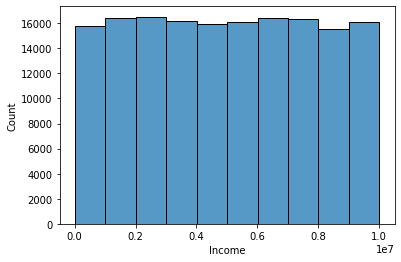

In [18]:
sns.histplot(train['Income'], bins = 10);

In [19]:
train['STATE'].value_counts()

Uttar_Pradesh        18141
Maharashtra          16378
Andhra_Pradesh       16120
West_Bengal          15076
Bihar                12611
Tamil_Nadu           10592
Madhya_Pradesh        9171
Karnataka             7556
Gujarat               7279
Rajasthan             5849
Jharkhand             5692
Haryana               5094
Telangana             4827
Assam                 4557
Kerala                3713
Delhi                 3448
Punjab                3048
Odisha                2985
Chhattisgarh          2406
Uttarakhand           1240
Jammu_and_Kashmir     1158
Puducherry             940
Mizoram                556
Manipur                544
Tripura                524
Himachal_Pradesh       506
Uttar_Pradesh[5]       477
Chandigarh             418
Sikkim                 374
Name: STATE, dtype: int64

In [20]:
train['CURRENT_HOUSE_YRS'].value_counts() 

11    33269
12    33048
13    32538
14    31432
10    30993
Name: CURRENT_HOUSE_YRS, dtype: int64

In [21]:
train.Experience.value_counts()

9     8428
6     8360
18    8184
12    8173
10    7992
14    7913
5     7857
15    7771
19    7739
17    7728
16    7686
3     7669
4     7534
13    7437
1     7422
11    7349
8     7305
20    7248
7     7211
2     7150
0     7124
Name: Experience, dtype: int64

In [22]:
train.Profession.value_counts()

Physician                     3766
Statistician                  3736
Web_designer                  3508
Computer_hardware_engineer    3417
Magistrate                    3417
Chemical_engineer             3412
Psychologist                  3401
Comedian                      3387
Air_traffic_controller        3383
Drafter                       3380
Hotel_Manager                 3361
Mechanical_engineer           3351
Fashion_Designer              3345
Technical_writer              3345
Industrial_Engineer           3344
Biomedical_Engineer           3278
Financial_Analyst             3268
Graphic_Designer              3264
Petroleum_Engineer            3246
Flight_attendant              3232
Police_officer                3228
Secretary                     3221
Computer_operator             3195
Software_Developer            3174
Artist                        3163
Technician                    3151
Microbiologist                3134
Surgeon                       3110
Politician          

In [23]:
train.Experience.unique()

array([20,  5, 11,  7,  2, 15, 12,  8, 18, 10,  9, 13, 19, 14,  3,  4,  1,
        6, 17, 16,  0])

In [24]:
# feature engineering

def age(age):
  if age > 60:
    return 'over 60'
  elif age > 40:
    return '4-50s'
  elif age > 30:
    return '30s'
  else:
    return 'under 30s'


def north(state):
  # 북부지역과 아닌 지역으로 나눔
  north_list = ['Sikkim', 'Uttar_Pradesh', 'Chandigarh', 'Manipur', 'Tripura', 'Mizoram', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 
                'Uttarakhand', 'Punjab', 'Assam', 'Telangana', 'Haryana', 'Rajasthan', 'Bihar', 'West_Bengal']
  if state in north_list:
    return 'North area'
  else:
    return 'Not North'

def exp(exp):
  if exp <= 2:
    return 'Entry'
  elif exp <= 5:
    return 'Intermediate'
  elif exp <= 10:
    return 'Mid'
  else:
    return 'Senior'


def job_year(year):
  if year < 5:
    return 1
  elif year <= 10:
    return 2
  else:
    return 3

def feature(df):
  cols = ['ID', 'CITY']

  df.drop(columns = cols, inplace = True)
  df.reset_index(drop = True, inplace = True)

  ranges = [-1.0, 0.4, 0.7, 1.0]
  label = ['Low', 'Mid', 'High']
  

  df.Age = df.Age.apply(age)
  df.Income = pd.cut(df.Income, bins = ranges, labels = label).astype('string')
  df.CURRENT_JOB_YRS = df.CURRENT_JOB_YRS.apply(job_year)
  df.STATE = df.STATE.apply(north)
  df.Experience = df.Experience.apply(exp)
  # df.Profession = df.Profession.apply(job)
  df.CURRENT_HOUSE_YRS = df.CURRENT_HOUSE_YRS.apply(lambda x: 'over 12' if x > 12 else 'under 12')

  return df

minmax = MinMaxScaler()

train['Income'] = minmax.fit_transform(train[['Income']])
val['Income'] = minmax.transform(val[['Income']])
test['Income'] = minmax.transform(test[['Income']])

train = feature(train)
val = feature(val)
test = feature(test)

train.head().T

,0,1,2,3,4
Income,Mid,High,High,High,High
Age,under 30s,30s,under 30s,over 60,4-50s
Experience,Senior,Intermediate,Senior,Mid,Entry
MarriedOrSingle,single,single,single,single,single
House_Ownership,rented,rented,rented,rented,rented
Car_Ownership,no,no,no,no,yes
Profession,Microbiologist,Secretary,Lawyer,Computer_operator,Biomedical_Engineer
STATE,Not North,North area,North area,North area,North area
CURRENT_JOB_YRS,3,2,2,2,1
CURRENT_HOUSE_YRS,over 12,over 12,under 12,over 12,under 12


In [25]:
X_train = train.drop(columns = target)
y_train = train[target]
X_val = val.drop(columns = target)
y_val = val[target]
X_test = test.drop(columns = target)
y_test = test[target]

y_train.value_counts(normalize = True)

0    0.876997
1    0.123003
Name: Risk_Flag, dtype: float64

In [62]:
X_train.head().T

,0,1,2,3,4
Income,Mid,High,High,High,High
Age,under 30s,30s,under 30s,over 60,4-50s
Experience,Senior,Intermediate,Senior,Mid,Entry
MarriedOrSingle,single,single,single,single,single
House_Ownership,rented,rented,rented,rented,rented
Car_Ownership,no,no,no,no,yes
Profession,Microbiologist,Secretary,Lawyer,Computer_operator,Biomedical_Engineer
STATE,Not North,North area,North area,North area,North area
CURRENT_JOB_YRS,3,2,2,2,1
CURRENT_HOUSE_YRS,over 12,over 12,under 12,over 12,under 12


In [63]:
X_train.Profession.value_counts(normalize = True)

Physician                     0.023351
Statistician                  0.023165
Web_designer                  0.021751
Computer_hardware_engineer    0.021187
Magistrate                    0.021187
Chemical_engineer             0.021156
Psychologist                  0.021088
Comedian                      0.021001
Air_traffic_controller        0.020976
Drafter                       0.020957
Hotel_Manager                 0.020840
Mechanical_engineer           0.020778
Fashion_Designer              0.020740
Technical_writer              0.020740
Industrial_Engineer           0.020734
Biomedical_Engineer           0.020325
Financial_Analyst             0.020263
Graphic_Designer              0.020238
Petroleum_Engineer            0.020126
Flight_attendant              0.020040
Police_officer                0.020015
Secretary                     0.019971
Computer_operator             0.019810
Software_Developer            0.019680
Artist                        0.019612
Technician               

In [64]:
X_train.Car_Ownership.value_counts(normalize = True)

no     0.698772
yes    0.301228
Name: Car_Ownership, dtype: float64

In [27]:
y_train.head().T

0    1
1    0
2    1
3    0
4    0
Name: Risk_Flag, dtype: int64

In [28]:
ord_list = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
ord_mapping = [
           {'col': 'Income', 'mapping': {'High': 3, 'Mid': 2, 'Low': 1, 'NaN': 0}},
           {'col': 'Age', 'mapping': {'under 30s': 1, '30s': 2, '4-50s': 3, 'over 60': 4, 'NaN': 0}},
           {'col': 'Experience', 'mapping': {'Entry': 1, 'Intermediate': 2, 'Mid': 3, 'Senior': 4, 'NaN': 0}},
           {'col': 'CURRENT_HOUSE_YRS', 'mapping': {'under 12': 1, 'over 12': 2, 'NaN': 0}}
]
onehot_list = ['Profession', 'STATE', 'House_Ownership', 'Car_Ownership', 'MarriedOrSingle']

In [29]:
# Logistic Regression 학습


logistic_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(
        random_state = 2
    )
)
logistic_pipe.fit(X_train, y_train)
y_pred = logistic_pipe.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print('Training score: ', logistic_pipe.score(X_train, y_train))
print('Validation score: ', logistic_pipe.score(X_val, y_val))
print(f'Validation dataset MAE: ${mae:,.5f}')
print(f'Validation dataset R2 score: ${r2:,.3f}\n')

Training score:  0.8769965277777778
Validation score:  0.8770089285714285
Validation dataset MAE: $0.12299
Validation dataset R2 score: $-0.140



In [30]:
# Decision Tree 학습

decision_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(),
    DecisionTreeClassifier(
        random_state = 2
    )
)

decision_pipe.fit(X_train, y_train)
y_pred = decision_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation score: ', decision_pipe.score(X_val, y_val))

print('ROC AUC score: ', roc_auc_score(y_val, y_pred))
print('f1 score: ', f1)
print(classification_report(y_val, y_pred))

Validation score:  0.8807539682539682
ROC AUC score:  0.6987410279178549
f1 score:  0.485445205479452
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35361
           1       0.52      0.46      0.49      4959

    accuracy                           0.88     40320
   macro avg       0.72      0.70      0.71     40320
weighted avg       0.87      0.88      0.88     40320



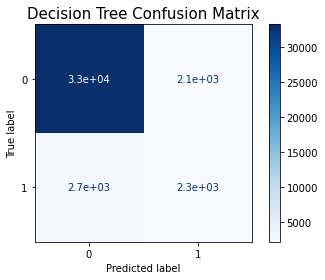

In [31]:
# DecisionTree Confusion Matrix 확인
fig, ax = plt.subplots()

pcm = plot_confusion_matrix(decision_pipe, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('Decision Tree Confusion Matrix', fontsize = 15)
plt.show()

In [32]:
# RandomForest 학습

rf_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True, cols = onehot_list),
    SimpleImputer(),
    RandomForestClassifier(
        n_jobs = -1, 
        random_state = 2)
)

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_val)
f1 = f1_score(y_val, y_pred)

print('Validation score: ', rf_pipe.score(X_val, y_val))
print('ROC AUC score: ', roc_auc_score(y_val, y_pred))
print('f1 score: ', f1)
print(classification_report(y_val, y_pred))

Validation score:  0.8878968253968254
ROC AUC score:  0.7035934931133694
f1 score:  0.5018734846815076
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     35361
           1       0.55      0.46      0.50      4959

    accuracy                           0.89     40320
   macro avg       0.74      0.70      0.72     40320
weighted avg       0.88      0.89      0.88     40320



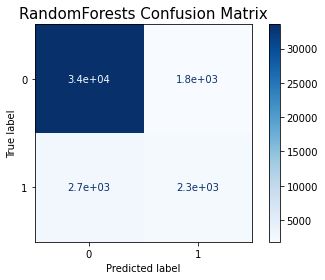

In [33]:
# RandomForest Confusion Matrix
fig, ax = plt.subplots()

pcm = plot_confusion_matrix(rf_pipe, X_val, y_val, cmap = plt.cm.Blues, ax = ax)
plt.title('RandomForests Confusion Matrix', fontsize = 15)
plt.show()

In [34]:
# XGBoost 학습

xgb_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    TargetEncoder(cols = onehot_list),
    XGBClassifier(
        learning_rate = 0.1,
        random_state = 42
    )
)


xgb_pipe.fit(X_train, y_train)
xgb_pred = xgb_pipe.predict(X_val)
print('accuracy_score: ', accuracy_score(y_val, xgb_pred))
print('ROC AUC score: ', roc_auc_score(y_val, xgb_pred))

accuracy_score:  0.8770089285714285
ROC AUC score:  0.5


In [35]:
# RandomForest Hyper Parameter Tuning

# for i in list(range(2, 11)):
  # scores = cross_val_score(pipe, X_train, y_train, cv = i, scoring = 'f1')
  # print('k = ', i)
  # print('f1 score: ', scores)
  # print(f'f1 score mean: {scores.mean():,.8f}\n')

In [ ]:
# 한시간 반을 돌려도 안돌아가서 포기 ...

random_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    OneHotEncoder(use_cat_names = True),
    SimpleImputer(),
    RandomForestClassifier(random_state = 2)
)

dists = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__n_estimators': [100, 200, 300, 400, 500],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', None],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8, 10, 12],
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    random_pipe,
    param_distributions = dists,
    n_iter = 5,
    cv = 4,
    verbose = 1,
    n_jobs = -1
)

clf.fit(X_train, y_train)

print('best hyperparameter: ', clf.best_params_)
print('best f1 score: ', clf.best_score_)

In [68]:
# 최종 모델(RandomForest) 하이퍼 파라미터 튜닝

new_pipe = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping),
    TargetEncoder(cols = onehot_list),
    SimpleImputer(),
    RandomForestClassifier(
        n_estimators = 300,
        max_features = 'sqrt',
        min_samples_leaf = 5,
        class_weight = 'balanced',
        n_jobs = -1, 
        random_state = 2)
)

new_pipe.fit(X_train, y_train)
y_val_pred = new_pipe.predict(X_val)
y_test_pred = new_pipe.predict(X_test)
f1_val = f1_score(y_val, y_val_pred)
f1_test = f1_score(y_test, y_test_pred)

print('validation 검증 정확도: ', new_pipe.score(X_val, y_val))
print('ROC AUC score: ', roc_auc_score(y_val, y_val_pred))
print('f1 score: ', f1_val)
print(classification_report(y_val, y_val_pred))

print('\n\n-----------------------------\n\n')

print('test 검증 정확도: ', new_pipe.score(X_test, y_test))
print('ROC AUC score: ', roc_auc_score(y_test, y_test_pred))
print('f1 score: ', f1_test)
print(classification_report(y_test, y_test_pred))

validation 검증 정확도:  0.8579117063492063
ROC AUC score:  0.8363800522389986
f1 score:  0.5830725565824904
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     35361
           1       0.46      0.81      0.58      4959

    accuracy                           0.86     40320
   macro avg       0.71      0.84      0.75     40320
weighted avg       0.91      0.86      0.87     40320



-----------------------------


test 검증 정확도:  0.856845238095238
ROC AUC score:  0.8301758210895388
f1 score:  0.5773038842345772
              precision    recall  f1-score   support

           0       0.97      0.87      0.91     44201
           1       0.45      0.79      0.58      6199

    accuracy                           0.86     50400
   macro avg       0.71      0.83      0.75     50400
weighted avg       0.90      0.86      0.87     50400



In [69]:
# RandomForest Model Permutation Importance


# permuter에서 사용할 pipe 정의
random_pipe = Pipeline([
                        ('preprocessing', make_pipeline(
                            OrdinalEncoder(cols = ord_list, mapping = ord_mapping), 
                            TargetEncoder(cols = onehot_list)
                            )
                        ),
                        ('rf', RandomForestClassifier(
                            n_estimators = 300,
                            max_features = 'sqrt',
                            min_samples_leaf = 5,
                            class_weight = 'balanced',
                            n_jobs = -1,
                            random_state = 2
                        ))
])

random_pipe.named_steps


{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=['Income', 'Age', 'Experience',
                                       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'],
                                 drop_invariant=False, handle_missing='value',
                                 handle_unknown='value',
                                 mapping=[{'col': 'Income',
                                           'mapping': {'High': 3, 'Low': 1,
                                                       'Mid': 2, 'NaN': 0}},
                                          {'col': 'Age',
                                           'mapping': {'30s': 2, '4-50s': 3,
                                                       'NaN': 0, 'over 60': 4,
                                                       'under 30s': 1}},
                                          {'...
                                          {'col': 'CURRENT_HOUSE_YRS',
                    

In [70]:
random_pipe.fit(X_train, y_train)
print('검증 정확도: ', random_pipe.score(X_val, y_val))

검증 정확도:  0.8579117063492063


In [71]:
# permuter 정의

permuter = PermutationImportance(
    random_pipe.named_steps['rf'],
    scoring = 'f1',
    n_iter = 5,
    random_state = 2
)

X_val_transformed = random_pipe.named_steps['preprocessing'].transform(X_val)


permuter.fit(X_val_transformed, y_val);

In [72]:
feature_names = X_val.columns.tolist()

# 특성 score 확인
pd.Series(permuter.feature_importances_, feature_names).sort_values()

House_Ownership      0.032998
MarriedOrSingle      0.052392
Car_Ownership        0.146363
CURRENT_JOB_YRS      0.149365
CURRENT_HOUSE_YRS    0.153720
STATE                0.163922
Income               0.224984
Experience           0.232734
Age                  0.255007
Profession           0.384138
dtype: float64

In [73]:
# 특성 score 보기 좋게 정리
eli5.show_weights(
    permuter,
    top = None,
    feature_names = feature_names
)

Weight,Feature
0.3841 ± 0.0069,Profession
0.2550 ± 0.0053,Age
0.2327 ± 0.0071,Experience
0.2250 ± 0.0055,Income
0.1639 ± 0.0033,STATE
0.1537 ± 0.0089,CURRENT_HOUSE_YRS
0.1494 ± 0.0089,CURRENT_JOB_YRS
0.1464 ± 0.0029,Car_Ownership
0.0524 ± 0.0049,MarriedOrSingle
0.0330 ± 0.0034,House_Ownership


In [74]:
# Shap으로 시각화 하기 위해 pipeline으로 만들었던 모델을 processor / model로 나눔

processor = make_pipeline(
    OrdinalEncoder(cols = ord_list, mapping = ord_mapping), 
    TargetEncoder(cols = onehot_list)
)

X_train_processed = processor.fit_transform(X_train, y_train)
X_val_processed = processor.transform(X_val)


model = RandomForestClassifier(
    n_estimators = 300,
    max_features = 'sqrt',
    min_samples_leaf = 5,
    class_weight = 'balanced',
    n_jobs = -1, 
    random_state = 2
)

model.fit(X_train_processed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [75]:
X_test_processed = processor.transform(X_test)
y_pred_proba = model.predict_proba(X_test_processed)[1]
y_test_pred = model.predict(X_test_processed)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91     44201
           1       0.45      0.79      0.58      6199

    accuracy                           0.86     50400
   macro avg       0.71      0.83      0.75     50400
weighted avg       0.90      0.86      0.87     50400



In [76]:
row = X_test.iloc[[100]]
row

,Income,Age,Experience,MarriedOrSingle,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
100,Low,30s,Mid,single,rented,yes,Consultant,North area,2,under 12


In [77]:
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0], 
    shap_values=shap_values[0], 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [106]:
row = X_test.iloc[[2190]]
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value[0],
    shap_values = shap_values[0],
    features = row,
    link = 'logit'
)

In [112]:
shap_values = explainer.shap_values(X_test_processed.iloc[:500])

shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_processed.iloc[:500])